# Loan Data Exploration
## by Nwani Ugonna Stanley

## Introduction
> This data set is based on people that take loans for one reason or the other. The data set contains 113,937 rows and 81 columns on each loan including loan amount, borrower rate or interest rate, current loan status, borrower income, loan original amount, employment status and many others.
>
> This [data dictionary](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0) explains the columns in the data set
  



## Preliminary Wrangling


In [50]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [51]:
# set notebook to show all the rows and columns.
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [52]:
# read in the data and view a sample of the data
df = pd.read_csv('prosperLoanData.csv')

df.sample(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
20166,632C359521401380577F225,1003477,2013-11-19 12:51:50.013000000,NaN,60,Current,NaN,0.23318,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,1,WI,Police Officer/Correction Officer,Employed,58.0,False,False,NaN,2013-11-19 12:51:52,680.0,699.0,2003-12-26 00:00:00,12.0,12.0,18.0,7,663.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,18418.0,0.89,2150.0,17.0,1.00,1.0,0.27,"$50,000-74,999",True,4583.333333,28EE36993542272523F257F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,4,111381,15000,2013-11-22 00:00:00,Q4 2013,C3FE36978837265987321E1,404.54,1205.0515,433.05,772.0015,-37.43,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
107490,DDCE3599056746687E41DAD,1116521,2014-01-04 10:39:18.490000000,NaN,36,Current,NaN,0.18275,0.1465,0.1365,0.12898,0.0549,0.07408,5.0,B,5.0,1,FL,Retail Management,Employed,27.0,False,False,NaN,2014-01-04 10:39:20,660.0,679.0,1988-12-06 00:00:00,7.0,7.0,28.0,7,255.0,1.0,8.0,0.0,0.0,19.0,1.0,0.0,3990.0,0.70,1496.0,23.0,0.73,2.0,0.19,"$25,000-49,999",True,2166.666667,4F2C37026986707677BB958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,2,125403,4000,2014-01-10 00:00:00,Q1 2014,5A533702655121230E16061,137.98,136.3745,88.21,48.1645,-3.40,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
88428,C0B43388199794756214322,134943,2007-05-09 10:15:42.610000000,E,36,Completed,2009-10-05 00:00:00,0.25517,0.2400,0.2200,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Military Enlisted,Full-time,10.0,False,True,5AFC33643897547591BD1C8,2007-05-04 10:25:57.850000000,580.0,599.0,2006-10-17 00:00:00,2.0,2.0,2.0,1,2.0,4.0,9.0,0.0,0.0,0.0,0.0,0.0,2.0,0.00,498.0,2.0,0.50,1.0,0.23,"$1-24,999",True,1582.416667,7A573388586805931CDFA22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,82,15137,7500,2007-05-21 00:00:00,Q2 2007,44073388290310638265A44,294.25,10325.4100,7500.00,2825.4100,-114.36,0.0,0.0,0.0,0.0,1.0,0,0,0.0,81
98868,C15F348278626944169A872,458169,2010-05-13 06:49:09.163000000,NaN,36,Completed,2013-05-18 00:00:00,0.21476,0.1900,0.1800,-0.01000,0.1800,-0.01000,1.0,HR,5.0,7,MI,Professional,Full-time,143.0,True,False,NaN,2010-05-10 14:34:29,740.0,759.0,1992-07-01 00:00:00,11.0,6.0,35.0,5,87.0,1.0,2.0,0.0,0.0,12.0,0.0,0.0,1610.0,0.00,0.0,31.0,0.74,1.0,0.29,"$25,000-49,999",True,4083.333333,552E3587850723391C67362,2.0,30.0,30.0,0.0,0.0,4400.0,1387.52,95.0,0,NaN,46,42527,1500,2010-05-18 00:00:00,Q2 2010,97B83387458434424A9A2A7,54.98,1981.1300,1500.00,481.1300,-25.31,0.0,0.0,0.0,0.0,1.0,0,0,0.0,12
72770,F9AC3379285626975D053EE,90540,2007-01-29 19:22:27.2270

There are 81 columns as stated in the Introduction, but not all the columns are going to be used in this data exploration. 

In [53]:
# subset the data set to contain only columns that are important in this analysis.

important_cols = ['Term', 'LoanStatus', 'BorrowerRate', 'ProsperRating (numeric)', 'ProsperScore', 'ListingCategory (numeric)',
                  'EmploymentStatus', 'IsBorrowerHomeowner', 'IncomeVerifiable', 'StatedMonthlyIncome', 'Investors',
                  'LoanCurrentDaysDelinquent', 'LoanOriginalAmount', 'MonthlyLoanPayment', 'Recommendations']

# filter out the columns not listed above and assign to a new dataframe
loan_df = df[important_cols]

# view a sample of the new dataframe
loan_df.sample(10)

,Term,LoanStatus,BorrowerRate,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatus,IsBorrowerHomeowner,IncomeVerifiable,StatedMonthlyIncome,Investors,LoanCurrentDaysDelinquent,LoanOriginalAmount,MonthlyLoanPayment,Recommendations
38220,36,Completed,0.3200,NaN,NaN,7,Full-time,False,True,4791.666667,30,0,1000,0.00,0
98797,36,Completed,0.1559,5.0,6.0,1,Employed,False,True,4333.333333,1,0,12000,419.46,0
21300,36,Completed,0.3099,2.0,3.0,1,Employed,False,True,4166.666667,90,0,7500,322.47,0
55168,36,Current,0.2148,4.0,6.0,3,Self-employed,True,False,7500.000000,239,0,15000,568.83,0
76534,36,Current,0.1620,5.0,5.0,1,Employed,True,True,4917.833333,1,0,8500,299.67,0
723,36,Current,0.1099,6.0,8.0,1,Employed,True,True,5833.333333,1,0,4000,130.94,0
44680,36,Completed,0.3450,3.0,6.0,3,Not employed,False,False,0.000000,71,0,4500,202.29,0
47849,36,Completed,0.0808,NaN,NaN,0,Full-time,True,True,3333.333333,73,0,2500,78.43,0
75555,36,Chargedoff,0.1946,NaN,NaN,0,Full-time,True,True,11559.583333,159,2219,17500,645.56,1
7897,36,Completed,0.1300,NaN,NaN,3,Full-time,False,True,1166.666667,54,0,2500,84.23,0


In [54]:
# how many rows and columns does this data subset have
loan_df.shape

(113937, 15)

In [55]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Term                       113937 non-null  int64  
 1   LoanStatus                 113937 non-null  object 
 2   BorrowerRate               113937 non-null  float64
 3   ProsperRating (numeric)    84853 non-null   float64
 4   ProsperScore               84853 non-null   float64
 5   ListingCategory (numeric)  113937 non-null  int64  
 6   EmploymentStatus           111682 non-null  object 
 7   IsBorrowerHomeowner        113937 non-null  bool   
 8   IncomeVerifiable           113937 non-null  bool   
 9   StatedMonthlyIncome        113937 non-null  float64
 10  Investors                  113937 non-null  int64  
 11  LoanCurrentDaysDelinquent  113937 non-null  int64  
 12  LoanOriginalAmount         113937 non-null  int64  
 13  MonthlyLoanPayment         11

A few things are wrong in this dataset;
> `ProsperRating (numeric)` can be converted to category dtype following the data dictionary. The column should be renamed for readability.
>
> `Term` can also be converted to category dtype since it can be only one of three values.
>
> `ListingCategory (numeric)` can be converted from numbers to their respective categories following the data dictionary. The column should also be renamed for readability.

Create dictionaries to map the numbers to their respective values for the `ProsperRating (numeric)` and `ListingCategory (numeric)` columns.

In [56]:
# According to the data dictionary, NaN values are marked as 0. So I am converting NaN values in this column to 'N/A' string
rating = {1.0: 'HR', 2.0: 'E', 3.0: 'D', 4.0: 'C', 5.0: 'B', 6.0: 'A', 7.0: 'AA', np.nan: 'N/A'}

# mapping integers to their values following the data dictionary
listing = {0: 'Not Available', 1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 4: 'Personal Loan',
           5: 'Student Use', 6: 'Auto', 7: 'Other', 8: 'Baby&Adoption', 9: 'Boat', 10: 'Cosmetic Procedure',
           11: 'Engagement Ring', 12: 'Green Loans', 13: 'Househole Expenses', 14: 'Large Purchases',
           15: 'Medical/Dental', 16: 'Motorcycle', 17: 'RV', 18: 'Taxes', 19: 'Vacation', 20: 'Wedding Loans'}

# effect changes using the map function
loan_df['ProsperRating (numeric)'] = loan_df['ProsperRating (numeric)'].map(rating)
loan_df['ListingCategory (numeric)'] = loan_df['ListingCategory (numeric)'].map(listing)

In [57]:
# rename columns
loan_df.rename(columns={'ProsperRating (numeric)': 'ProsperRating', 'ListingCategory (numeric)': 'ListingCategory'},
               inplace=True)

In [58]:
# view sample of the dataset to inspect changes
loan_df.sample(5)

,Term,LoanStatus,BorrowerRate,ProsperRating,ProsperScore,ListingCategory,EmploymentStatus,IsBorrowerHomeowner,IncomeVerifiable,StatedMonthlyIncome,Investors,LoanCurrentDaysDelinquent,LoanOriginalAmount,MonthlyLoanPayment,Recommendations
26748,36,Current,0.2254,D,3.0,Vacation,Employed,False,True,5416.666667,1,0,10000,384.70,0
97834,36,Current,0.1099,A,7.0,Debt Consolidation,Employed,True,True,5666.666667,1,0,5500,180.04,0
17639,36,Current,0.2769,E,3.0,Home Improvement,Employed,True,True,4833.333333,1,0,10000,411.96,0
45097,60,Current,0.1435,B,8.0,Debt Consolidation,Employed,False,True,7083.333333,33,0,20000,469.00,0
61566,36,Current,0.0930,A,7.0,Debt Consolidation,Employed,False,True,4166.666667,1,0,10000,319.40,0


In [59]:
# convert ProsperRating to category datatype
rating = ['N/A', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA']
terms = [12, 36, 60]

prosper_rating = pd.api.types.CategoricalDtype(ordered=True, categories=rating)
term = pd.api.types.CategoricalDtype(ordered=True, categories=terms)

loan_df['ProsperRating'] = loan_df['ProsperRating'].astype(prosper_rating)
loan_df['Term'] = loan_df['Term'].astype(term)

#### Summary Statistics

In [60]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   Term                       113937 non-null  category
 1   LoanStatus                 113937 non-null  object  
 2   BorrowerRate               113937 non-null  float64 
 3   ProsperRating              113937 non-null  category
 4   ProsperScore               84853 non-null   float64 
 5   ListingCategory            113937 non-null  object  
 6   EmploymentStatus           111682 non-null  object  
 7   IsBorrowerHomeowner        113937 non-null  bool    
 8   IncomeVerifiable           113937 non-null  bool    
 9   StatedMonthlyIncome        113937 non-null  float64 
 10  Investors                  113937 non-null  int64   
 11  LoanCurrentDaysDelinquent  113937 non-null  int64   
 12  LoanOriginalAmount         113937 non-null  int64   
 13  MonthlyLoanPay

In [61]:
loan_df.describe(include='all')

,Term,LoanStatus,BorrowerRate,ProsperRating,ProsperScore,ListingCategory,EmploymentStatus,IsBorrowerHomeowner,IncomeVerifiable,StatedMonthlyIncome,Investors,LoanCurrentDaysDelinquent,LoanOriginalAmount,MonthlyLoanPayment,Recommendations
count,113937.0,113937,113937.000000,113937,84853.000000,113937,111682,113937,113937,1.139370e+05,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000
unique,3.0,12,NaN,8,NaN,21,8,2,2,NaN,NaN,NaN,NaN,NaN,NaN
top,36.0,Current,NaN,N/A,NaN,Debt Consolidation,Employed,True,True,NaN,NaN,NaN,NaN,NaN,NaN
freq,87778.0,56576,NaN,29084,NaN,58308,67322,57478,105268,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.192764,NaN,5.950067,NaN,NaN,NaN,NaN,5.608026e+03,80.475228,152.816539,8337.01385,272.475783,0.048027
std,NaN,NaN,0.074818,NaN,2.376501,NaN,NaN,NaN,NaN,7.478497e+03,103.239020,466.320254,6245.80058,192.697812,0.332353
min,NaN,NaN,0.000000,NaN,1.000000,NaN,NaN,NaN,NaN,0.000000e+00,1.000000,0.000000,1000.00000,0.000000,0.000000
25%,NaN,NaN,0.134000,NaN,4.000000,NaN,NaN,NaN,NaN,3.200333e+03,2.000000,0.000000,4000.00000,131.620000,0.000000
50%,NaN,NaN,0.184000,NaN,6.000000,NaN,NaN,NaN,NaN,4.666667e+03,44.000000,0.000000,6500.00000,217.740000,0.000000
75%,NaN,NaN,0.250000,NaN,8.000000,NaN,NaN,NaN,NaN,6.825000e+03,115.000000,0.000000,12000.00000,371.580000,0.000000


* Off the bat, I can see that the `ProsperScore` column has a maximum value of 11. The data dictonary stated that 10 was the maximum score but a quick [google search](https://www.prosper.com/plp/general-prosper_score/#:~:text=A%20custom%20risk%20score%20was,%2C%20score%2C%20is%20a%201.) showed that the highest is infact 11.
* It seems like somebody is earning 1750000 per month (the maximum of the `StatedMonthlyIncome` column). If the maximum `MonthlyLoanPayment` is 2251.51. If these two variables are related in anyway, something might be wrong in that row.

In [62]:
loan_df[loan_df.StatedMonthlyIncome > 1000000]

,Term,LoanStatus,BorrowerRate,ProsperRating,ProsperScore,ListingCategory,EmploymentStatus,IsBorrowerHomeowner,IncomeVerifiable,StatedMonthlyIncome,Investors,LoanCurrentDaysDelinquent,LoanOriginalAmount,MonthlyLoanPayment,Recommendations
53167,36,Current,0.3177,HR,4.0,Business,Self-employed,True,False,1.750003e+06,2,0,4000,173.71,0


This person is a Self employed Business owner. Seeing as it is only one row that is earning over 1 million a month, the person in question may have mistaken the column as yearly income.

-------------------------------------------------------------------------------------------------------------------------------

### What is the structure of your dataset?

> The data set has been trimmed down to 113937 records and 15 variables. The variables are a mixed combination of numeric, object, boolean and category data types. The variables are `Term`, `LoanStatus`, `BorrowerRate`, `ProsperRating`, `ProsperScore`, `ListingCategory`, `EmploymentStatus`, `IsBorrowerHomeowner`, `IncomeVerifiable`, `StatedMonthlyIncome`, `Investors`, `LoanCurrentDaysDelinquent`, `LoanOriginalAmount`, `MonthlyLoanPayment`, `Recommendations`.

### What is/are the main feature(s) of interest in your dataset?

> The `LoanStatus` and `ProsperScore` columns are the features of interest in this data set. I am interested to know which of the other columns affect these two columns. For example, what variables are likely to lead to a higher prosper score.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The rest of the variables would help support the investigation into the features of interest. I am particularly interested in the `EmploymentStatus`, `Term`, `IsBorrowerHomeowner` and `StatedMonthlyIncome` columns. Does the employment status of a person heavily determine whether a person is able to repay the loan?, Does the amount a person earns per month increase the chances of repaying the loan?, and many other questions that would be investigated.

## Univariate Exploration

> In this section, I investigate distributions of individual variables.

In [63]:
# set color for all visualizations to be made in the Univariate Exploration
base_color = sns.color_palette()[9]

#### Question

Let's start with the distribution one of our features of interest, `LoanStatus` in this dataset.

#### Visualization

In [64]:
# Let's view the counts of values in the column.
loan_df['LoanStatus'].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

A few things can be done to clean this column.
> The rows that are Past due can be changed to represent one value.
>
> The rows that have Cancelled can be changed to Completed since these loans are not in effect any longer. 

In [65]:
# list of values to change
change = ['Past Due (1-15 days)', 'Past Due (31-60 days)', 'Past Due (61-90 days)',
          'Past Due (91-120 days)', 'Past Due (16-30 days)', 'Past Due (>120 days)', 'Cancelled']

# loop through each value in the list above
for value in change:
    # if value contains 'Past Due' change to 'Past Due'
    if 'Past Due' in value:
        loan_df['LoanStatus'] = loan_df.LoanStatus.replace(value, 'Past Due')
    # everything else, change to 'Completed'
    else:
        loan_df['LoanStatus'] = loan_df.LoanStatus.replace(value, 'Completed')

In [66]:
# check to see that changes have been effected
loan_df['LoanStatus'].value_counts()

Current                   56576
Completed                 38079
Chargedoff                11992
Defaulted                  5018
Past Due                   2067
FinalPaymentInProgress      205
Name: LoanStatus, dtype: int64

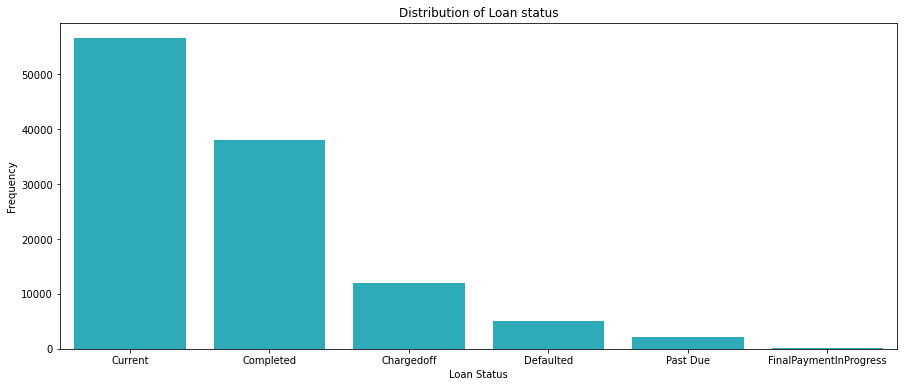

In [67]:
plt.figure(figsize=(15, 6))

order = loan_df.LoanStatus.value_counts(ascending=False).index
sns.countplot(x='LoanStatus', data=loan_df, color=base_color, order=order);

# labels and title
plt.title('Distribution of Loan status');
plt.xlabel('Loan Status');
plt.ylabel('Frequency');

#### Observation(s)

Most of the loans here are either Current or Completed. A good number of loans have been Charged off, meaning that the creditor has given up on collecting the money owed. There are also a few defaulters and loans whose payment date is past due.

-------------------------------------------------------------------------------------------------------------------------------

#### Question

How long do people take loans for?

#### Visualization

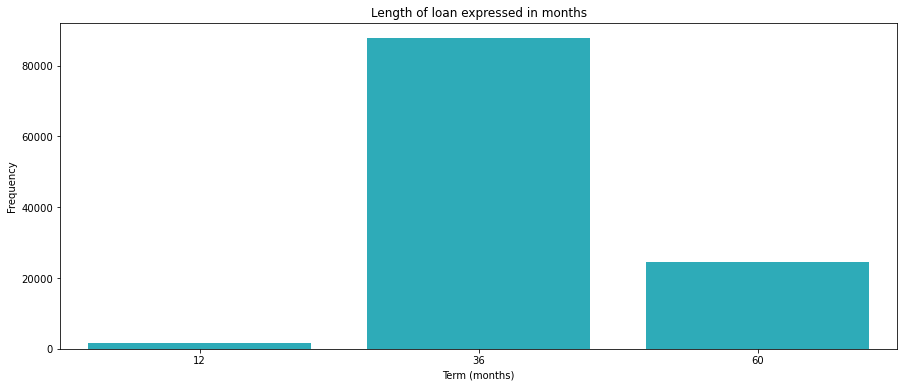

In [68]:
plt.figure(figsize=(15, 6))

sns.countplot(x='Term', data=loan_df, color=base_color);

# labels and title
plt.title('Length of loan expressed in months');
plt.xlabel('Term (months)');
plt.ylabel('Frequency');

#### Observation(s)

A large majority of people take loans for 36 months (3 years). Next set of people prefer the 60 months (5 years) duration. Very few people take loans for 12 months (1 year). Does this mean that people are more comfortable taking loans that can be paid back over a long period of time?

-------------------------------------------------------------------------------------------------------------------------------

#### Question

What is the distribution of Borrower's interest rate on a loan?

#### Visualization

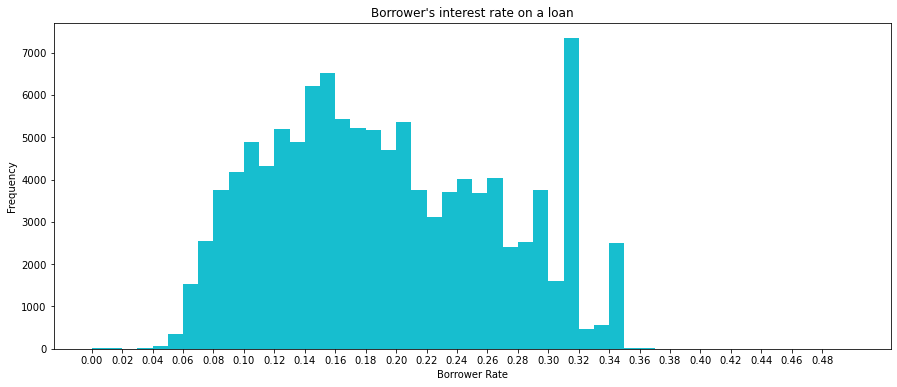

In [69]:
plt.figure(figsize=(15, 6))

bins = np.arange(0, 0.5 + 0.01, 0.01)
plt.hist('BorrowerRate', data=loan_df, bins=bins, color=base_color)

xticks = np.arange(0, 0.5, 0.02)

# labels and title
plt.title("Borrower's interest rate on a loan");
plt.xlabel('Borrower Rate');
plt.ylabel('Frequency');
plt.xticks(xticks);

#### Observation(s)

The histogram looks to have two peaks, the first peak around 0.14 - 0.16 and the second peak around 0.31 - 0.32. It seems like the most common interest rate is between 0.31 and 0.32.

-------------------------------------------------------------------------------------------------------------------------------

#### Question

What are the Prosper Ratings of people the collected loan?

#### Visualization

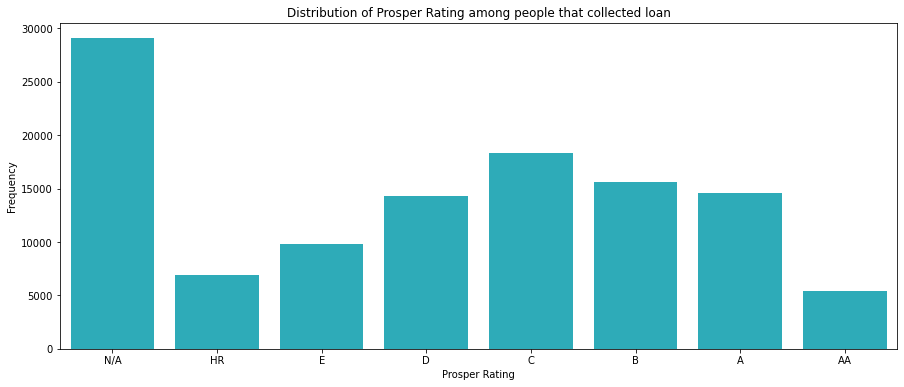

In [70]:
plt.figure(figsize=(15, 6))

sns.countplot(x='ProsperRating', data=loan_df, color=base_color);

# labels and title
plt.title('Distribution of Prosper Rating among people that collected loan');
plt.xlabel('Prosper Rating');
plt.ylabel('Frequency');

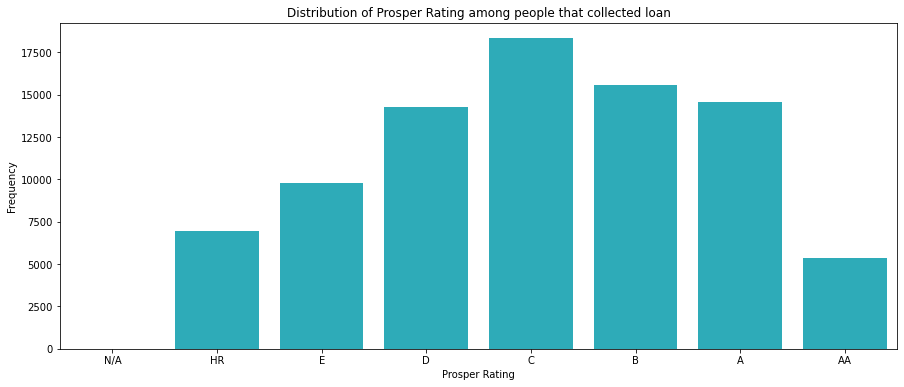

In [71]:
plt.figure(figsize=(15, 6))

# plot data excluding those that have no rating (people that took loans before July 2009 when ratings took effect).
sns.countplot(x='ProsperRating', data=loan_df[~(loan_df.ProsperRating == 'N/A')] , color=base_color);

# labels and title
plt.title('Distribution of Prosper Rating among people that collected loan');
plt.xlabel('Prosper Rating');
plt.ylabel('Frequency');

#### Observation(s)

The N/A category which contains people that took loans before July 2009 has the highest frequency.

Excluding N/A values we see that the Prosper Ratings are normally distributed with most people having a Prosper rating of 'C'. Perhaps we will see the same trend when we investigate the `ProsperScore` column?

-------------------------------------------------------------------------------------------------------------------------------

#### Question

What is the distribution of Prosper Score among people that collected loan?

#### Visualization

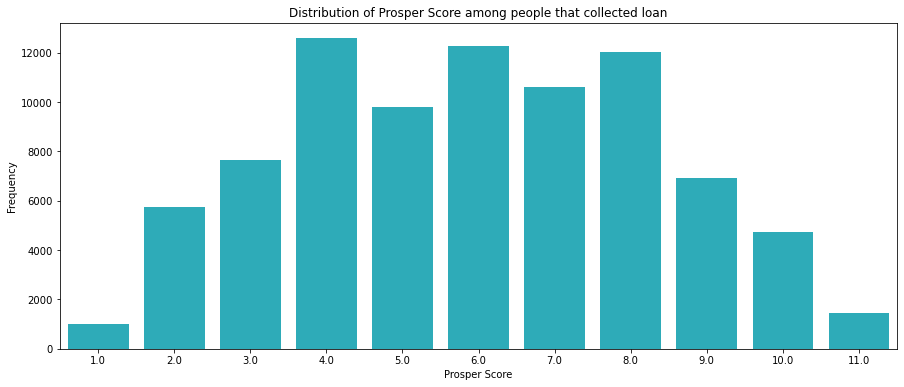

In [72]:
plt.figure(figsize=(15, 6))

sns.countplot(x='ProsperScore', data=loan_df, color=base_color);

# labels and title
plt.title('Distribution of Prosper Score among people that collected loan');
plt.xlabel('Prosper Score');
plt.ylabel('Frequency');

#### Observation(s)

Our hunch was correct! The Prosper Score looks to be normally distributed with most people having a score between 4 and 8.

-------------------------------------------------------------------------------------------------------------------------------

#### Question

What category did people choose as a reason for requesting for a loan?

#### Visualization

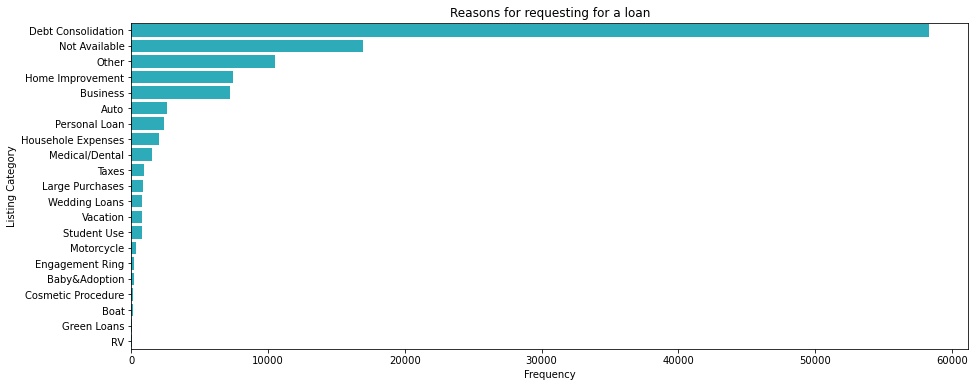

In [73]:
plt.figure(figsize=(15, 6))

order = loan_df['ListingCategory'].value_counts(ascending=False).index
sns.countplot(y='ListingCategory', data=loan_df, color=base_color, order=order);

# labels and title
plt.title('Reasons for requesting for a loan');
plt.xlabel('Frequency');
plt.ylabel('Listing Category');

#### Observation(s)

A vast majority of people are requesting for loans to pay off other debts. The next two categories of people did not seem to find their reason among the listed categories.

-------------------------------------------------------------------------------------------------------------------------------

#### Question

What is the employment status of people that are taking loans?

#### Visualization

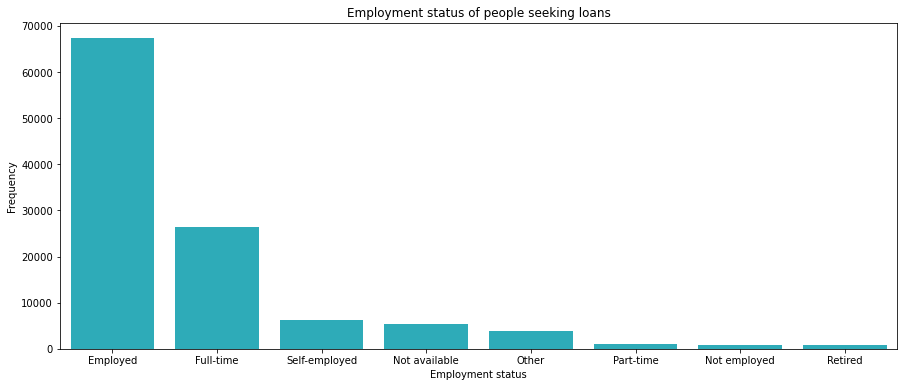

In [74]:
plt.figure(figsize=(15, 6))

order = loan_df['EmploymentStatus'].value_counts(ascending=False).index
sns.countplot(x='EmploymentStatus', data=loan_df, color=base_color, order=order);

# labels and title
plt.title('Employment status of people seeking loans');
plt.xlabel('Employment status');
plt.ylabel('Frequency');

#### Observation(s)

Most of the people taking loans are employed (either full-time or self-employed).

The Employed value filled by people could mean Full-time, Self-employed or Part-time. This is the reason why changing the value to match one of those three was not done.

-------------------------------------------------------------------------------------------------------------------------------

#### Question

How many percentage of borrowers owns a house?

#### Visualization

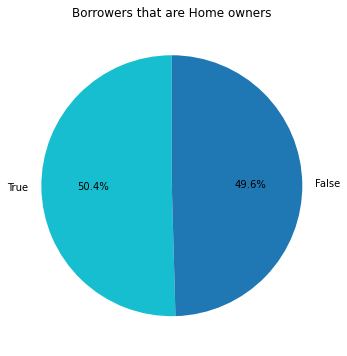

In [75]:
plt.figure(figsize=(15,6))

# group data into the different values in the IsBorrowerHomeowner column
home_owner = loan_df.IsBorrowerHomeowner.value_counts()

# specify labels and colors of the pie chart
labels = ['True', 'False']
colors = [base_color, sns.color_palette()[0]]

plt.pie(home_owner, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)

# add a title
plt.title('Borrowers that are Home owners')
plt.show() 

#### Observation(s)

Borrowers are almost evenly split between home owners and non-home owners. Home owners are slightly more than the other.

-------------------------------------------------------------------------------------------------------------------------------

#### Question

What is the distribution of monthly income of people taking loans?

#### Visualization

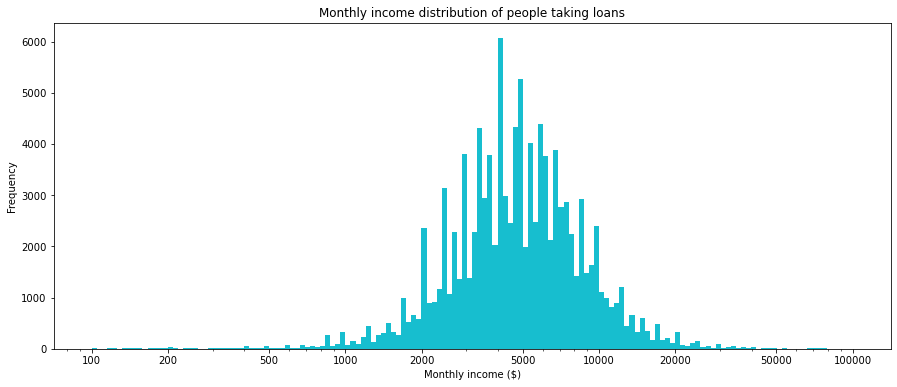

In [76]:
plt.figure(figsize=(15, 6))

bins = 10 ** (np.arange(2, 5 + 0.02, 0.02))
plt.hist('StatedMonthlyIncome', data=loan_df, color=base_color,bins=bins)

# using log scale because of the large difference in values
plt.xscale('log')

# set appropriate ticks on the x-axis
ticks = [100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]
plt.xticks(ticks, ticks)

# labels and title
plt.title("Monthly income distribution of people taking loans");
plt.xlabel('Monthly income ($)');
plt.ylabel('Frequency');

#### Observation(s)

There a few things to point out in this histogram;
> The histogram was constructed to exclude the very high value of salary that we spotted earlier. This was done so that we could see the overall trend more clearly.
>
> There are spikes at certain intervals in the histogram, I suspect that this occurs near round figures of numbers.
>
> Above all, we see that this histogram is normally distributed with its peak around 4000 - 5000 mark

-------------------------------------------------------------------------------------------------------------------------------

#### Question

How much are people asking for loans?

#### Visualization

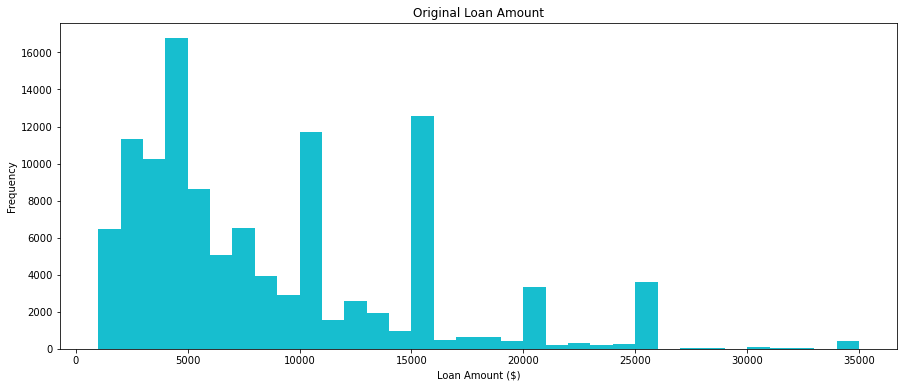

In [77]:
plt.figure(figsize=(15, 6))

bins = np.arange(1000, 35000 + 1000, 1000)
plt.hist('LoanOriginalAmount', data=loan_df, bins=bins, color=base_color)

# labels and title
plt.title("Original Loan Amount");
plt.xlabel('Loan Amount ($)');
plt.ylabel('Frequency');

#### Observation(s)

The histogram is right skewed meaning that more people are asking for smaller loan amounts. The spikes occur at round figures of numbers.

-------------------------------------------------------------------------------------------------------------------------------

#### Question

What does the distribution of monthly loan payment look like?

#### Visualization

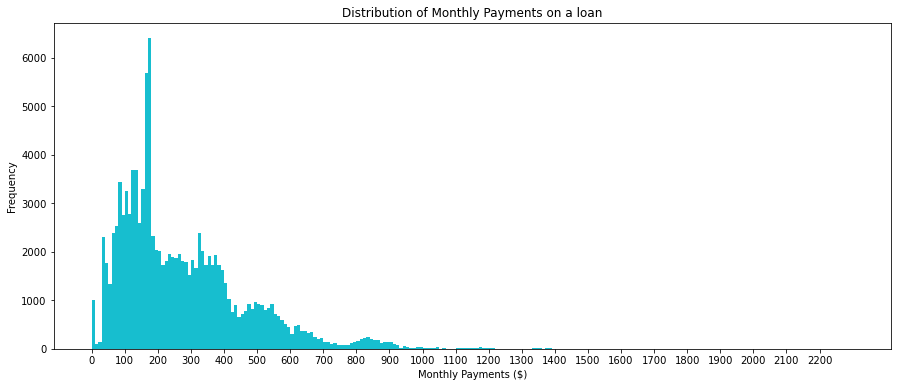

In [78]:
plt.figure(figsize=(15, 6))

bins = np.arange(0, 2300 + 10, 10)
plt.hist('MonthlyLoanPayment', data=loan_df, bins=bins, color=base_color)

# set tick labels for x axis to show information clearly
ticks = [x for x in range(0, 2300, 100)]

# labels and title
plt.title("Distribution of Monthly Payments on a loan");
plt.xlabel('Monthly Payments ($)');
plt.ylabel('Frequency');
plt.xticks(ticks);

#### Observation(s)

The histogram is right skewed meaning that most people are paying smaller amounts per month on their loan. The mode of this distribution is between the 100 and 200 mark.

-------------------------------------------------------------------------------------------------------------------------------

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The `LoanStatus` column has most of its loans currently running. A good amount of loans have been completed while a few others were Charged off. The rest of the distribution contained loans that have defaulted, were past due or had final payments in progress. I transformed some of the values in the column by changing all the values that had Past due with the range of days the loan has been past due into a new value, 'Past Due'.
>
> The `ProsperScore` column was normally distributed with most people having a score between 4 and 8. A quick google check showed that the maximum/best score was 11 and not 10. Very few amount of people had the worst score of 1 or the best score 0f 11.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> In the `Term` column, most people preferred taking loans for 36 months rather than 60 or 12 months.
>
> There was an unusually high frequency around 0.31 and 0.32 in the `BorrowerRate` column.
>
> In the `ProsperRating` column, I omitted ratings with 0 i.e. N/A values (Loans taken before July 2009 when Ratings took effect). I did this to remove the noise (the N/A value had a lot of people in that category) and to see the trend present in the distribution of other ratings.
>
> There were spikes around round figures in the distribution of the `LoanOriginalAmount` and `StatedMonthlyIncome` columns.

-------------------------------------------------------------------------------------------------------------------------------

## Bivariate Exploration

> In this section, I investigate relationships between pairs of variables in the data.

#### Question

First and foremost, let's view relationships between the numerical variables. 

#### Visualization

In [79]:
numeric_variables = ['Term', 'BorrowerRate', 'ProsperScore', 'StatedMonthlyIncome', 'Investors',
                     'LoanCurrentDaysDelinquent', 'LoanOriginalAmount', 'MonthlyLoanPayment', 'Recommendations']

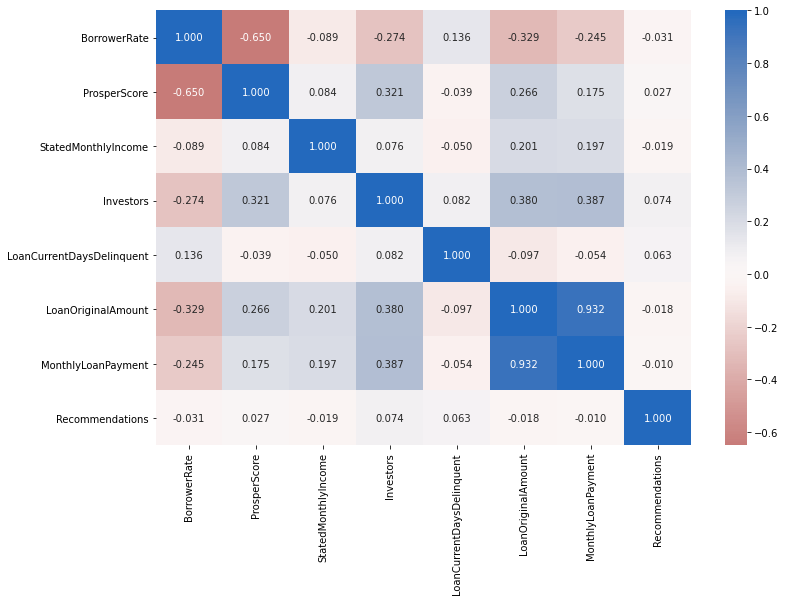

In [80]:
plt.figure(figsize=(12, 8))

sns.heatmap(loan_df[numeric_variables].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0);

#### Observation(s)

A few discoveries here:
> `MonthlyLoanPayment` is highly correlated with `LoanOriginalAmount`. No surprises here since loan amount is divided by the number of months and paid installmentally.
>
> `ProsperScore` and `BorrowerRate` also has a fairly strong negative correlation. 

The rest of the variables have weak correlations between each other. Nothing really stands out.

-------------------------------------------------------------------------------------------------------------------------------

#### Question

Although it seems pretty obvious, let's look at the average prosper scores for each prosper rating

#### Visualization

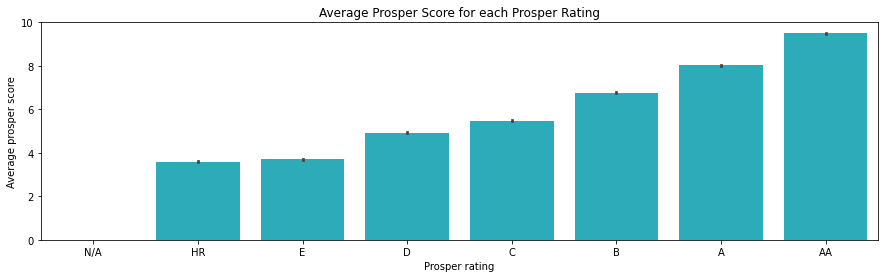

In [81]:
plt.figure(figsize=(15, 4))

sns.barplot(data=loan_df, x='ProsperRating', y='ProsperScore', color=base_color);

# labels and title
plt.title('Average Prosper Score for each Prosper Rating')
plt.xlabel('Prosper rating');
plt.ylabel('Average prosper score');

#### Observation(s)

As expected, the better the prosper rating, the higher the prosper score. The N/A value is blank because those are borrowers that took loans before prosper scores/ratings took effect on July, 2009.

-------------------------------------------------------------------------------------------------------------------------------

#### Question

Let us see how `MonthlyLoanPayment` (numerical variable) compares with `Term` (categorical variable)

#### Visualization

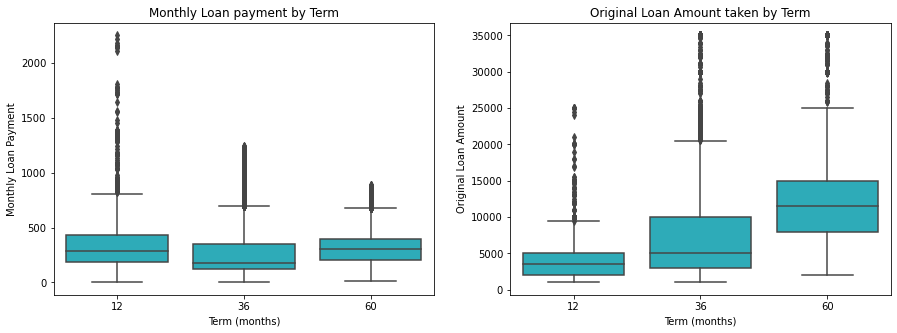

In [82]:
plt.figure(figsize=(15, 5))

# subplot 1: Term vs MonthlyLoanPayment
plt.subplot(1, 2, 1)
sns.boxplot(x='Term', y='MonthlyLoanPayment', data=loan_df, color=base_color);

plt.title('Monthly Loan payment by Term');
plt.xlabel('Term (months)');
plt.ylabel('Monthly Loan Payment');

# subplot 2: Term vs LoanOriginalAmount
plt.subplot(1, 2, 2)
sns.boxplot(x='Term', y='LoanOriginalAmount', data=loan_df, color=base_color);

plt.title('Original Loan Amount taken by Term');
plt.xlabel('Term (months)');
plt.ylabel('Original Loan Amount');

#### Observation(s)

* Borrowers that choose longer terms to pay their loans take much higher loans in general while those that take smaller loans choose a smaller timeframe to pay back. (right graph) 
* The monthly loan payment is almost the same for the three term categories because the higher the term, the more amount of money taken in loans.

-------------------------------------------------------------------------------------------------------------------------------

#### Question

Let's look at how `StatedMonthlyIncome` and `LoanOriginalAmount` (numeric variables) compare with `ProsperRating` and `LoanStatus` (categorical variables)

#### Visualization

<Figure size 720x720 with 0 Axes>

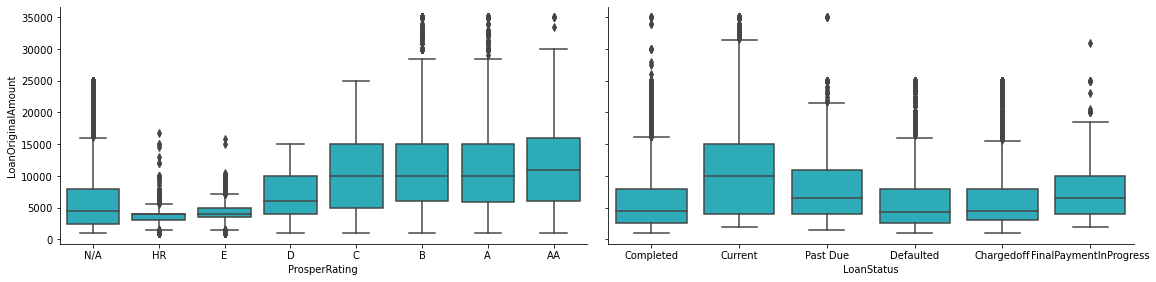

In [83]:
# plot matrix of numeric features against categorical features.
def boxgrid(x, y, **kwargs):
    """ 
    Quick hack for creating box plots with seaborn's PairGrid.
    """
    sns.boxplot(x, y, color=base_color)
    

# set figure size
plt.figure(figsize=(10, 10))
g = sns.PairGrid(data=loan_df, y_vars=['LoanOriginalAmount'], x_vars=['ProsperRating', 'LoanStatus'],
                size=4, aspect=2.0);
g.map(boxgrid);
plt.show();

<Figure size 720x720 with 0 Axes>

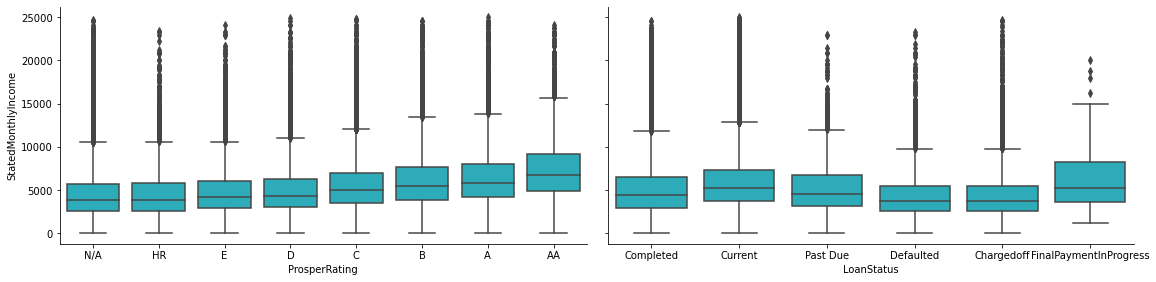

In [84]:
# set figure size
plt.figure(figsize=(10, 10))
g = sns.PairGrid(data=loan_df[loan_df['StatedMonthlyIncome'] < 25000], y_vars=['StatedMonthlyIncome'],
                 x_vars=['ProsperRating', 'LoanStatus'], size=4, aspect=2.0);
g.map(boxgrid);
plt.show();

In [85]:
# check the 99% quartile on the column StatedMonthlyIncome
np.quantile(loan_df.StatedMonthlyIncome, 0.99)

20526.666666879977

* I had to remove outliers in the `StatedMonthlyIncome` column (values > 25000) because it was preventing the boxplot from providing any useful information. The values greater that 25000 does not account for up to 1% of the dataset.

#### Observation(s)

A few interesting discoveries here;
> The median of `StatedMonthlyIncome` increased steadily as the `ProsperRating` got better.
>
> Same as the last point, `LoanOriginalAmount` increased steadily as the `ProsperRating` got better. 

These two points mean that people with better prosper ratings earned more money and took higher loan amounts. It would be interesting to compare `ProsperRating` and `LoanStatus` and see whether a better prosper rating meant more loans were Completed.
> People that defaulted on loans had the lowest median monthly income. Checking the original loan amount column, defaulters borrowed the smallest amount of loans in general compared to the other groups.
>

-------------------------------------------------------------------------------------------------------------------------------

#### Question

Let's look at how `ProsperScore` (numeric variable) compare with `IsBorrowerHomeowner` and `EmploymentStatus` (categorical variables)

#### Visualization

<Figure size 720x720 with 0 Axes>

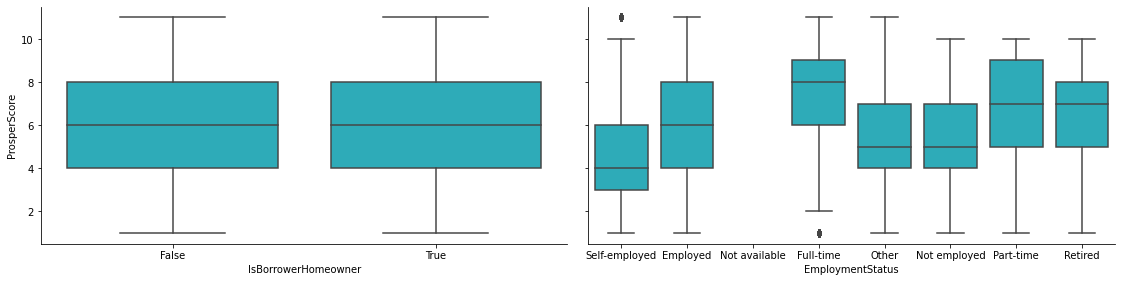

In [86]:
# set figure size
plt.figure(figsize=(10, 10))
g = sns.PairGrid(data=loan_df, y_vars=['ProsperScore'],
                 x_vars=['IsBorrowerHomeowner', 'EmploymentStatus'], size=4, aspect=2.0);
g.map(boxgrid);
plt.show();

#### Observation(s)

* Interestingly, people that filled Not available as Employment Status have no Prosper Score. These set of people probably took loans before July, 2009 when Prosper scores took effect.
* People in the 'Not employed', 'Other' and 'Self employed' categories had significantly lower Prosper scores. This is probably because their source of income is not stable (Self employed) or they dont have a source of income at all.
* Whether the person is a home owner or not does not affect the Prosper score since the plots are identical.

-------------------------------------------------------------------------------------------------------------------------------

#### Question

Let's look at relationships between categorical variables.

#### Visualization

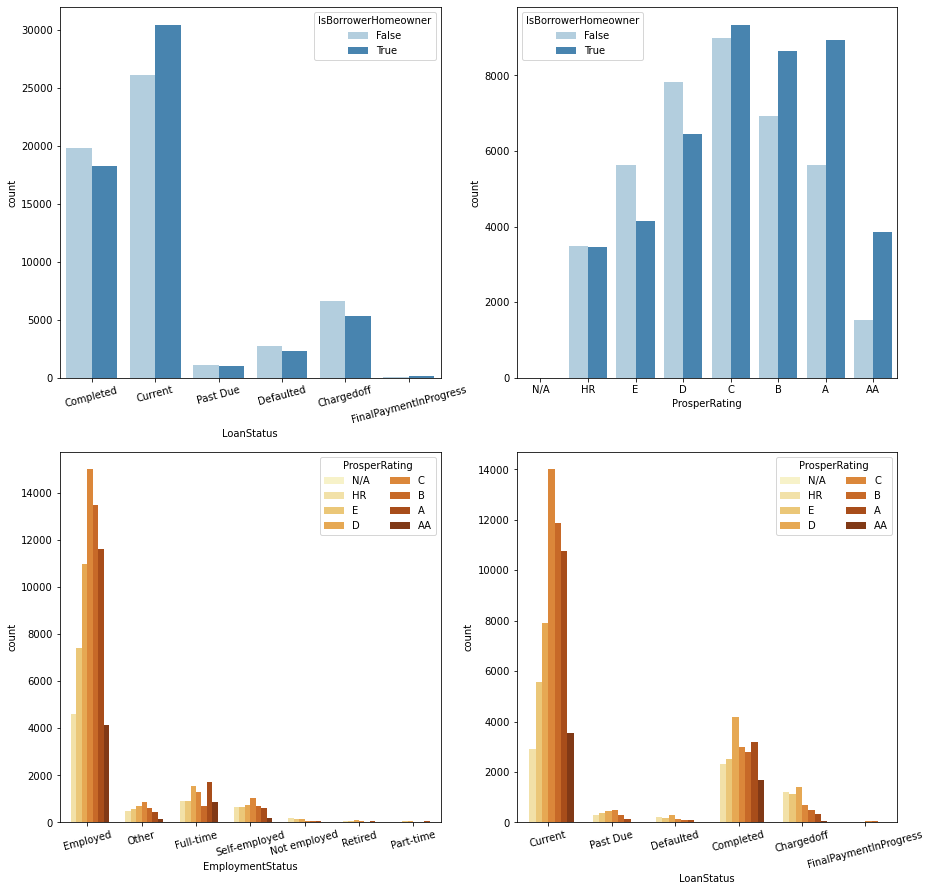

In [87]:
plt.figure(figsize = [15, 15])

# subplot 1: LoanStatus vs IsBorrowerHomeowner
plt.subplot(2, 2, 1)
sns.countplot(data=loan_df, x='LoanStatus', hue='IsBorrowerHomeowner', palette='Blues')
plt.xticks(rotation=15)

# subplot 2: ProsperRating vs. IsBorrowerHomeowner
# Exclude Prosper ratings of N/A. Those that took loans before ratings took effect in July 2009.
ax = plt.subplot(2, 2, 2)
sns.countplot(data=loan_df[loan_df['ProsperRating'] != 'N/A'], x='ProsperRating', hue='IsBorrowerHomeowner', palette='Blues')
ax.legend(loc='upper left', title='IsBorrowerHomeowner')

# subplot 3: EmploymentStatus vs. ProsperRating
# Exclude Prosper ratings of N/A. Those that took loans before ratings took effect in July 2009.
ax = plt.subplot(2, 2, 3)
sns.countplot(data=loan_df[loan_df['ProsperRating'] != 'N/A'], x='EmploymentStatus', hue='ProsperRating', palette='YlOrBr')
plt.xticks(rotation=15)
ax.legend(loc=1, ncol=2, title='ProsperRating') # re-arrange legend to remove overlapping

# subplot 4: LoanStatus vs. ProsperRating
# Exclude Prosper ratings of N/A. Those that took loans before ratings took effect in July 2009.
ax = plt.subplot(2, 2, 4)
sns.countplot(data=loan_df[loan_df['ProsperRating'] != 'N/A'], x='LoanStatus', hue='ProsperRating', palette='YlOrBr')
plt.xticks(rotation=15)
ax.legend(loc=1, ncol=2, title='ProsperRating') # re-arrange legend to remove overlapping

plt.show()

#### Observation(s)

* More borrowers that have their loans currently running own a home. The rest of the categories have it split almost equally between owning a home and not owning a home.
* We can see that more people with better Prosper Ratings own a home. As the prosper ratings get better, the ratio of people that own a home to those that do not own a home increases in the favour of those that own a home.
* The distribution of prosper ratings among the different employment statuses seems to be a normal distribution. Majority of people fall in the 'C' prosper rating. If we look closely at Full time employment status, we can see a spike at the end signifying that the mode of prosper rating in the Full time employment status category is the 'A' prosper rating.
* Same as EmploymentStatus, LoanStatus is normally distributed with ratings D and C being the most common. The ChargedOff category in the LoanStatus column is right skewed with the lower prosper ratings being the most common.

-------------------------------------------------------------------------------------------------------------------------------

#### Question

Let's view the relationship between `StatedMonthlyIncome` and `LoanOriginalAmount`.

#### Visualization

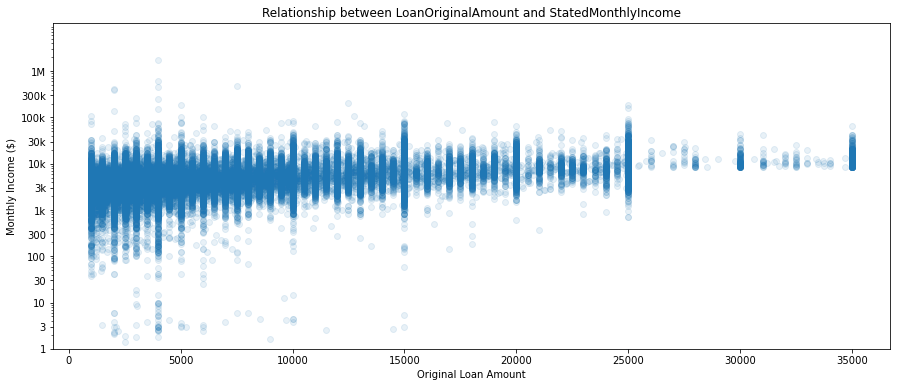

In [88]:
plt.figure(figsize = [15, 6])
plt.scatter(data=loan_df, x = 'LoanOriginalAmount', y = 'StatedMonthlyIncome', alpha=1/10)

# plot the y-axis as a log scale because of the unusually high value we identified earlier.
plt.yscale('log')
plt.yticks([1, 3, 10, 30, 100, 300, 1e3, 3e3, 1e4, 3e4, 1e5, 3e5, 1e6], 
           [1, 3, 10, 30, 100, 300, '1k', '3k', '10k', '30k', '100k', '300k', '1M'])

# labels and title
plt.title('Relationship between LoanOriginalAmount and StatedMonthlyIncome');
plt.xlabel('Original Loan Amount');
plt.ylabel('Monthly Income ($)');


#### Observation(s)

* There is very little correlation between these two variables. Increasing values of Loan amount does not change the Monthly income variable. Notice the spikes at the rounded figures of Original Loan Amount that we noted earlier. 

-------------------------------------------------------------------------------------------------------------------------------

#### Question

Let's view the relationship `StatedMonthlyIncome` has with `ProsperScore` and `BorrowerRate`.

#### Visualization

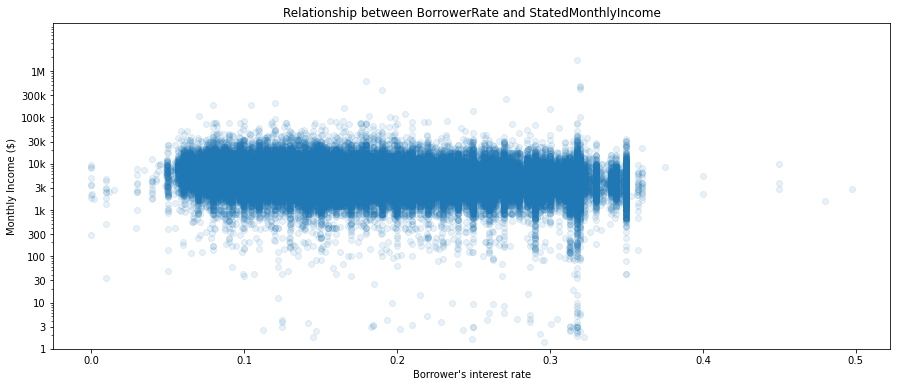

In [89]:
plt.figure(figsize = [15, 6])
plt.scatter(data=loan_df, x = 'BorrowerRate', y = 'StatedMonthlyIncome', alpha=1/10)

# plot the y-axis as a log scale because of the unusually high value we identified earlier.
plt.yscale('log')
plt.yticks([1, 3, 10, 30, 100, 300, 1e3, 3e3, 1e4, 3e4, 1e5, 3e5, 1e6], 
           [1, 3, 10, 30, 100, 300, '1k', '3k', '10k', '30k', '100k', '300k', '1M'])

# labels and title
plt.title('Relationship between BorrowerRate and StatedMonthlyIncome');
plt.xlabel("Borrower's interest rate");
plt.ylabel('Monthly Income ($)');


#### Visualization

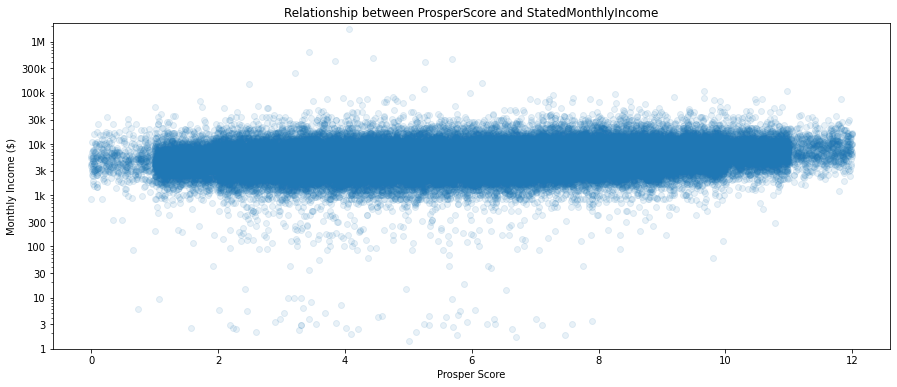

In [90]:
plt.figure(figsize = [15, 6])
sns.regplot(data=loan_df, x = 'ProsperScore', y = 'StatedMonthlyIncome', x_jitter=True, scatter_kws={'alpha': 1/10})

# plot the y-axis as a log scale because of the unusually high value we identified earlier.
plt.yscale('log')
plt.yticks([1, 3, 10, 30, 100, 300, 1e3, 3e3, 1e4, 3e4, 1e5, 3e5, 1e6], 
           [1, 3, 10, 30, 100, 300, '1k', '3k', '10k', '30k', '100k', '300k', '1M'])

# labels and title
plt.title('Relationship between ProsperScore and StatedMonthlyIncome');
plt.xlabel("Prosper Score");
plt.ylabel('Monthly Income ($)');


#### Observation(s)

`StatedMonthlyIncome` has almost no correlation with `BorrowerRate` and `ProsperScore`. Both columns have people with monthly income concentrated between 1k and 30k.

-------------------------------------------------------------------------------------------------------------------------------

#### Question

Let's view the relationship between `BorrowerRate` and `MonthlyLoanPayment`.

#### Visualization

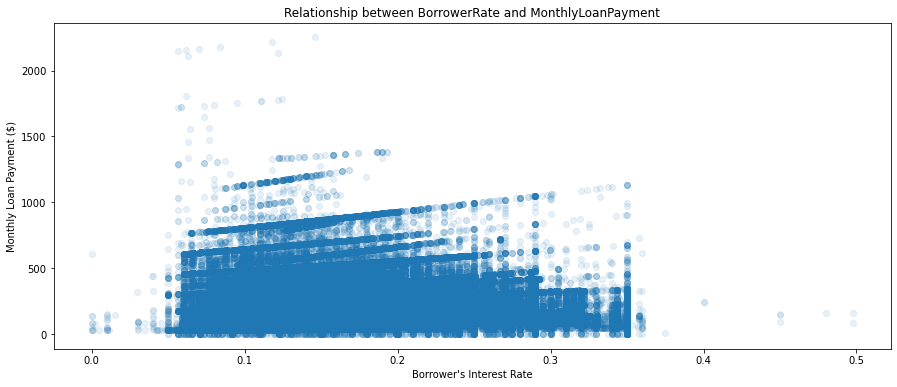

In [91]:
plt.figure(figsize = [15, 6])
plt.scatter(data=loan_df, x = 'BorrowerRate', y = 'MonthlyLoanPayment', alpha=1/10)

# labels and title
plt.title('Relationship between BorrowerRate and MonthlyLoanPayment');
plt.xlabel("Borrower's Interest Rate");
plt.ylabel('Monthly Loan Payment ($)');

#### Observation(s)

No correlation can be seen between these two variables.

-------------------------------------------------------------------------------------------------------------------------------

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> We saw an expected positive relationship between `ProsperScore` and `ProsperRating`.
>
> There was a fairly strong negative correlation between `ProsperScore` and `BorrowerRate` as seen on the heatmap. It seems that higher values of borrower's interest rate means that their prosper score is likely to be lower.
>
> Comparing the `LoanStatus` and the `StatedMonthlyIncome variable`, we see that people with *Defaulted* and *ChargedOff* Loan statuses had lower median monthly income. It is also worth pointing out that people with *Completed* loan status had the lowest median monthly income. *Current* loan status had the highest median monthly income. Could it be that people earning more per month got loans easier than those with lower income?
>
> Comparing `LoanStatus` and `PropserRating` in the clustered bar chart we see something interesting in the *ChargedOff* category. The distribution on the bars is right skewed meaning that people that were charged off had low prosper ratings. This makes sense logically because for a loaner to give up on collecting his/her debt, he/she must have decided that the borrower could not pay back. This is reflected in the Prosper ratings for the *ChargedOff* category. 
>
> Employment statuses that assured some sort of stable income like *Full-time* and *Part-time* had higher median Prosper scores that those statuses where the source of income was not guaranteed like *Self-employed* and *Not-employed*.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> People that take loans for a long time (`Term`) tend to take higher amounts in loans (`LoanOriginalAmount`). This balances out the amount needed to be paid monthly (`MonthlyLoanPayment`) and makes it seem like people that pay in lesser amount of time and people in larger amount of time pay the same amount.
>
> `MonthlyLoanPayment` is highly correlated with `LoanOriginalAmount`. No surprises here since loan amount is divided by the number of months and paid installmentally.
>
> The higher the `ProsperRating`, the higher the median `StatedMonthlyIncome` and `LoanOriginalAmount`.
>
> People that owned homes (`IsBorrowerHomeowner`) were significantly more than those that did not own homes in higher prosper rating categories.
>
> People that worked full time jobs were appeared frequently in better prosper rating categories than other employment statuses.

-------------------------------------------------------------------------------------------------------------------------------

## Multivariate Exploration

> In this section, I create plots of three or more variables to investigate the data even further.

#### Question

Let's look at how `ProsperScore` is affected by `Term` and `IsBorrowerHomeowner`

#### Visualization

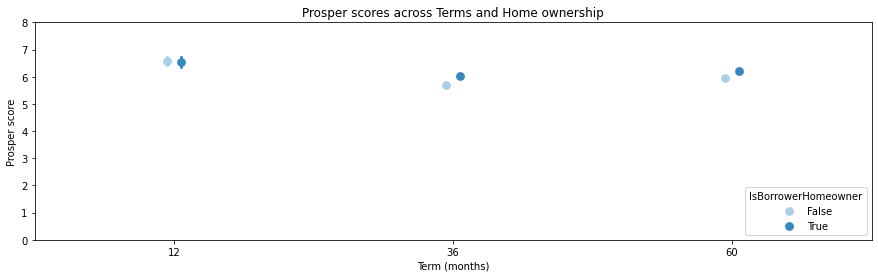

In [92]:
plt.figure(figsize = (15, 4))

sns.pointplot(data=loan_df, x='Term', y='ProsperScore', hue='IsBorrowerHomeowner', linestyles='',
              dodge=True, palette='Blues');

# labels and title
plt.title('Prosper scores across Terms and Home ownership')
plt.xlabel('Term (months)')
plt.ylabel('Prosper score')
plt.ylim(0, 8);
plt.legend(loc='lower right', title='IsBorrowerHomeowner');

#### Observation(s)

* Prosper scores are better for people that took loans for 12 months. This might be so because people that took loans for 12 months are very few in the data. 
* We can also see wicks from the points signifying confidence intervals. These wicks also appear because the data on the category is few.
* Across the 36 and 60 month loan terms, we see that people that own homes have better prosper scores.

-------------------------------------------------------------------------------------------------------------------------------

#### Question

Let's use the pointplot to see how other numerical (`LoanOriginalAmount` and `StatedMonthlyIncome`) and categorical variables (`ProsperRating` and `LoanStatus`) are affected by loan terms.

#### Visualization

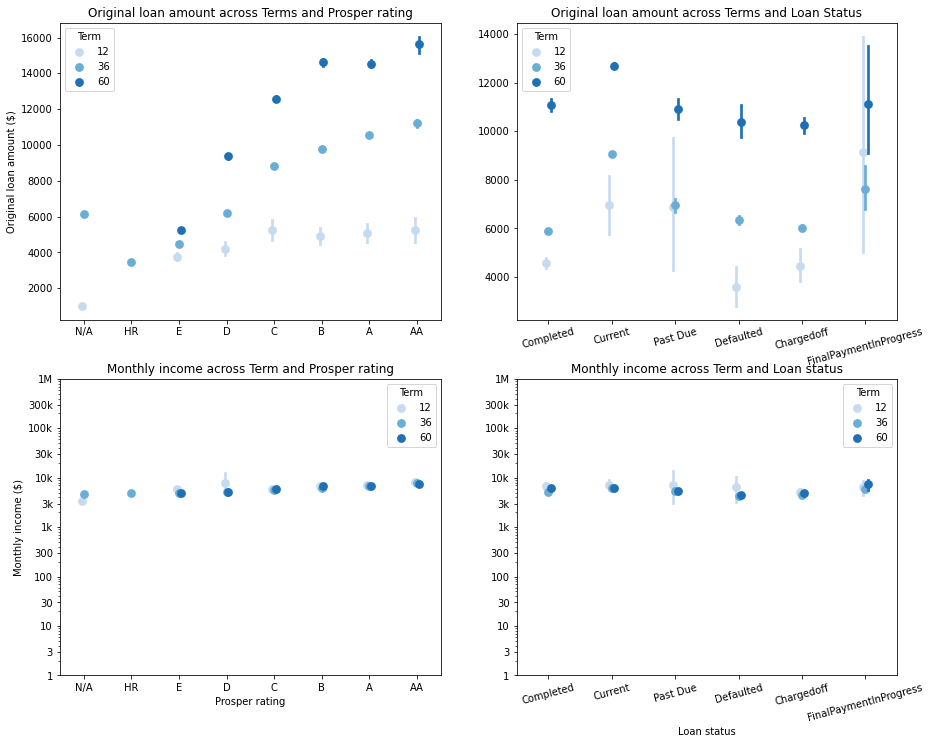

In [93]:
plt.figure(figsize = (15, 12))

# subplot 1: Term by LoanOriginalAmount and ProsperRating
plt.subplot(2, 2, 1)
sns.pointplot(data=loan_df, x='ProsperRating', y='LoanOriginalAmount', hue='Term', linestyles='',
              dodge=True, palette='Blues');

# labels and title
plt.title('Original loan amount across Terms and Prosper rating');
plt.xlabel(''); # labels at the bottom (figure 3) is the same for this plot
plt.ylabel('Original loan amount ($)');

# subplot 2: Term by LoanOriginalAmount and LoanStatus
plt.subplot(2, 2, 2)
sns.pointplot(data=loan_df, x='LoanStatus', y='LoanOriginalAmount', hue='Term', linestyles='',
              dodge=True, palette='Blues');

# labels and title
plt.title('Original loan amount across Terms and Loan Status');
plt.xlabel(''); # labels at the bottom (figure 4) is the same for this plot
plt.ylabel(''); # labels to the left (figure 1) is the same for this plot
plt.xticks(rotation=15);

# subplot 3: Term by StatedMonthlyIncome and ProsperRating
plt.subplot(2, 2, 3)
sns.pointplot(data=loan_df, x='ProsperRating', y='StatedMonthlyIncome', hue='Term', linestyles='',
              dodge=True, palette='Blues');

plt.yscale('log');
plt.yticks([1, 3, 10, 30, 100, 300, 1e3, 3e3, 1e4, 3e4, 1e5, 3e5, 1e6], 
           [1, 3, 10, 30, 100, 300, '1k', '3k', '10k', '30k', '100k', '300k', '1M']);

# labels and title
plt.title('Monthly income across Term and Prosper rating');
plt.xlabel('Prosper rating');
plt.ylabel('Monthly income ($)');

# subplot 4: Term by StatedMonthlyIncome and LoanStatus
plt.subplot(2, 2, 4)
sns.pointplot(data=loan_df, x='LoanStatus', y='StatedMonthlyIncome', hue='Term', linestyles='',
              dodge=True, palette='Blues');

plt.yscale('log');
plt.yticks([1, 3, 10, 30, 100, 300, 1e3, 3e3, 1e4, 3e4, 1e5, 3e5, 1e6], 
           [1, 3, 10, 30, 100, 300, '1k', '3k', '10k', '30k', '100k', '300k', '1M']);

# labels and title
plt.title('Monthly income across Term and Loan status');
plt.xlabel('Loan status');
plt.ylabel(''); # labels to the left (figure 3) is the same for this plot
plt.xticks(rotation=15);

#### Observation(s)

* Starting with the bottom plots, we see that the monthly income does not change by much for the different terms in both `ProsperRating` and `LoanStatus` columns.
* For the first plot (top left), we see increase in the original loan amount as the prosper rating gets better, but we also see that the longer the term, the more money that is borrowed by a person. This means that borrowers with prosper ratings of *AA*(the best rating), that chose a *60* month loan term(the longest term), borrowed the most amount of money in the group.
* For the second plot (top right), we see that people with *Current* loan status borrowed the highest amount of money in general for all three terms. The *Defaulted* and *ChargedOff* category borrowed the least amount of money in general for all three terms and were still unable to pay back despite earning almost the same amount on average per month as the *Completed* category (as seen in the fourth plot, bottom right).

-------------------------------------------------------------------------------------------------------------------------------

#### Question

Let's use a bar chart to see how Loan Status is affected by numerical (`StatedMonthlyIncome`, `LoanOriginalAmount`) and categorical (`IsBorrowerHomeowner`) variables

#### Visualization

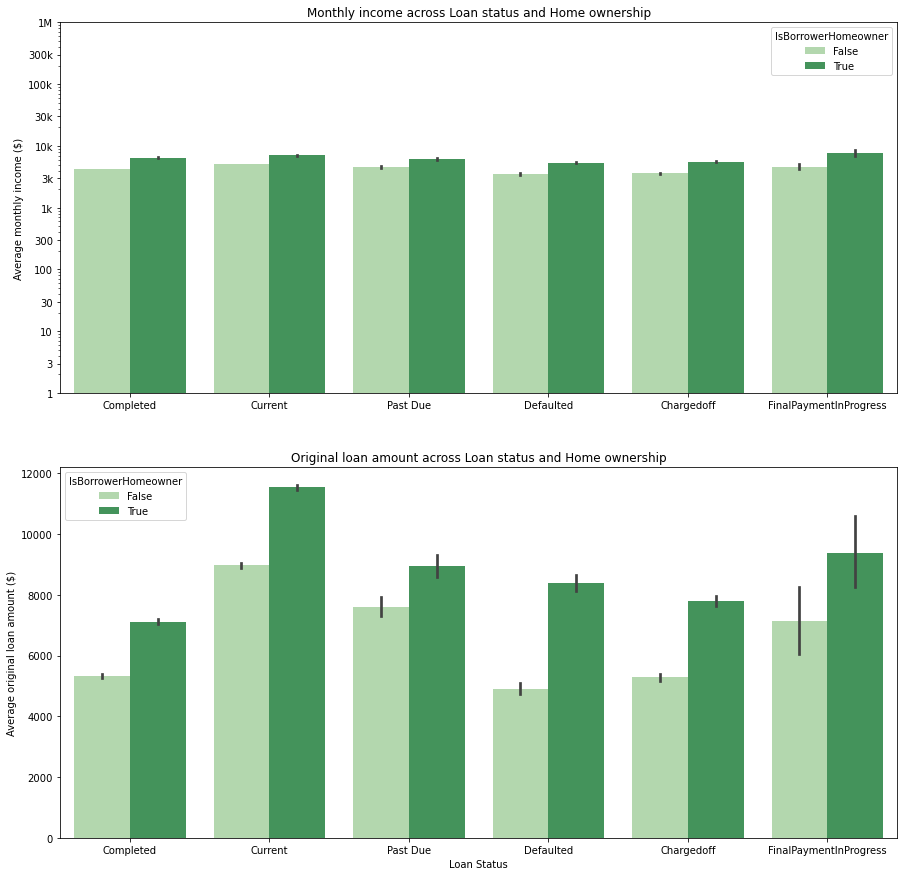

In [94]:
plt.figure(figsize=(15, 15))

# subplot 1: LoanStatus by IsBorrowerHomeowner and StatedMonthlyIncome
plt.subplot(2, 1, 1)
sns.barplot(data=loan_df, x='LoanStatus', y='StatedMonthlyIncome', hue='IsBorrowerHomeowner', palette='Greens');

# plot the y-axis as a log scale because of the unusually high value we identified earlier.
plt.yscale('log')
plt.yticks([1, 3, 10, 30, 100, 300, 1e3, 3e3, 1e4, 3e4, 1e5, 3e5, 1e6], 
           [1, 3, 10, 30, 100, 300, '1k', '3k', '10k', '30k', '100k', '300k', '1M'])

# labels and title
plt.title('Monthly income across Loan status and Home ownership')
plt.xlabel(''); # label for the bottom plot is the same for this one
plt.ylabel('Average monthly income ($)');

# subplot 2: LoanStatus by IsBorrowerHomeowner and LoanOriginalAmount
plt.subplot(2, 1, 2)
sns.barplot(data=loan_df, x='LoanStatus', y='LoanOriginalAmount', hue='IsBorrowerHomeowner', palette='Greens');

# labels and title
plt.title('Original loan amount across Loan status and Home ownership')
plt.xlabel('Loan Status');
plt.ylabel('Average original loan amount ($)');

#### Observation(s)

* Across all Loan status categories, people who own homes earn more money per month and take higher amounts of loans. This difference is more significant in the average loan amount taken. I suspect that the difference is so little in the monthly income plot because we used the log scale to scale the y-axis.

-------------------------------------------------------------------------------------------------------------------------------

#### Question

Let's see relationships between categorical variables (`Term`, `ProsperRating` and `IsBorrowerHomeowner`)

#### Visualization

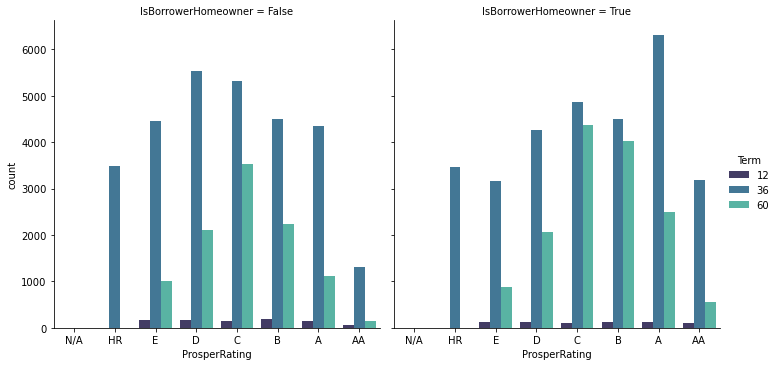

In [95]:
# I am filtering out prosper ratings that are N/A. i.e. loans taken before prosper ratings took effect (July 2009)

sns.catplot(x='ProsperRating', hue='Term', col='IsBorrowerHomeowner',
            data=loan_df[loan_df.ProsperRating != 'N/A'], kind='count', palette='mako');

#### Observation(s)

* For borrowers that are not home owners, the distribution of prosper ratings between terms is a normal distribution with *D* and *C* ratings being the most common for *36* and *60* terms. The *12* months term looks to be of equal count for all prosper ratings.
* For borrowers that own a home, the *A* prosper rating is the most common for the *36* month term. This *A* prosper rating popularity was seen previously when we viewed a countplot of `ProsperRating` and `EmploymentStatus`. The *60* month term has its count normally distributed like the borrowers with no home and the *12* month term looks to be of equal count for all prosper ratings.

-------------------------------------------------------------------------------------------------------------------------------

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The `IsBorrowerHomeowner` variable seems like a pretty big determining factor when it comes to monthly income a borrower earns and how much loan is taken originally. Borrowers that owned homes earned more money (`StatedMonthlyIncome`) and took more amounts in loan (`LoanOriginalAmount`) on average than those that did not own homes. This was seen across all Loan statuses (`Loanstatus`).

### Were there any interesting or surprising interactions between features?

> I extended my investigation of `ProsperRating` and `EmploymentStatus` where the *A* rating was popular for Full-time employees to include `Term` and `IsBorrowerHomeowner`. It was discovered that borrowers that owned homes and took loans for the *36* month term also had an unusually high amount of people with *A* rating.
>
> Digging deeper into the relationship between `OriginalLoanAmount` and `ProsperRating` where it was discovered that for better prosper ratings, higher amounts in loan were taken in general, I dug deeper and decided to see what this relationship looked like across terms (`Term`). I discovered that for longer amount of terms, the original loan amount was higher on average. This means that borrowers with prosper ratings of *AA*, that took loans for *60* months, took the highest amounts in loans on average.

-------------------------------------------------------------------------------------------------------------------------------